# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [30]:
import pandas as pd

# Carregando a base
application_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

#junção das bases
df = pd.merge(application_record, credit_record, on='ID', how='inner')


In [46]:
df.head(20)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
5,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
6,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
7,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
8,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
9,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0


Verificando a quantidade de missings

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [32]:
percentage = (df.isnull().sum() / len(df)) * 100
percentage

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.865806
CNT_FAM_MEMBERS         0.000000
MONTHS_BALANCE          0.000000
STATUS                  0.000000
dtype: float64

In [33]:
df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

podemos tratar os missings da variável OCCUPATION_TYPE com dummies para cada categoria e o missing apenas seria false para todas as categorias.
30% dos dados da variável OCCUPATION_TYPE são missing, então não podemos simplesmente excluir esses dados.

In [34]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Desconhecido')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

##### Verificando a quantidade de duplicados

In [36]:
df.duplicated().sum()

0

##### Distribuição da variável resposta

<Axes: xlabel='STATUS', ylabel='count'>

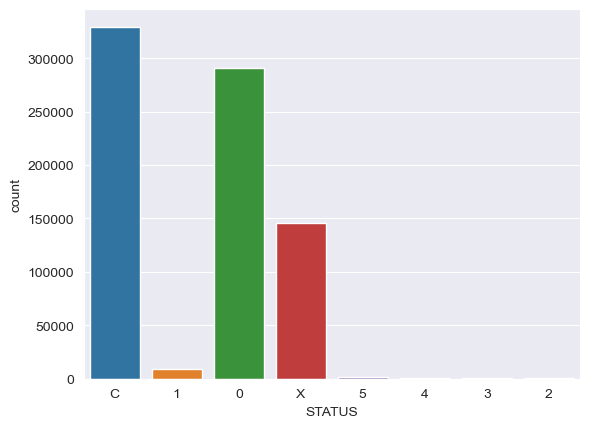

In [37]:
import seaborn as sns
# normal distribution
sns.countplot(x='STATUS', data=df)


Teremos que tratar para um problema de classificação.
Binário (Bom/Mau crédito):

Bom crédito: 'C' (quitado naquele mês), 'X' (sem empréstimo para o mês)
Mau crédito: '0', '1', '2', '3', '4', '5' (qualquer forma de atraso ou inadimplência)

In [38]:
# Criando a variável resposta
df['mau'] = df['STATUS'].apply(lambda x: 1 if x in ['0', '1', '2', '3', '4', '5'] else 0)
# Removendo a variável STATUS, substituída pela variável resposta 'mau'
df.drop(columns='STATUS', inplace=True)

In [39]:
df['mau'].value_counts()

0    475486
1    302229
Name: mau, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [40]:
# 1. Criando um dataframe com os nomes de cada variável e o tipo de dados de cada variável
metadados = pd.DataFrame({'variavel': df.columns, 'tipo': df.dtypes})

In [41]:
# 2. Adicionando uma coluna nesse dataframe chamada "qtd_categorias" e colocando nela o número de categorias correspondente de cada variável

qtd_categorias = [] # Iniciando uma lista vazia


for variavel in df.columns: # Fazendo um for ao longo dos nomes das variáveis
    
    
    qtd = df[variavel].nunique() # Contando o número de categorias dessa variável
    
    
    qtd_categorias.append(qtd) # adicionando essa informação na lista que criamos


metadados['qtd_categorias'] = qtd_categorias # Atribuindo a lista à nossa variável

In [42]:
metadados.head(21)

,variavel,tipo,qtd_categorias
ID,ID,int64,36457
CODE_GENDER,CODE_GENDER,object,2
FLAG_OWN_CAR,FLAG_OWN_CAR,object,2
FLAG_OWN_REALTY,FLAG_OWN_REALTY,object,2
CNT_CHILDREN,CNT_CHILDREN,int64,9
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,float64,265
NAME_INCOME_TYPE,NAME_INCOME_TYPE,object,5
NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE,object,5
NAME_FAMILY_STATUS,NAME_FAMILY_STATUS,object,5
NAME_HOUSING_TYPE,NAME_HOUSING_TYPE,object,6


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [43]:
# Criando variáveis dummy para as variáveis necessárias e removendo as variáveis que foram substituídas por dummies
df = pd.get_dummies(df, columns=[   'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'], drop_first=True)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 50 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 777715 non-null  int64  
 1   CNT_CHILDREN                                       777715 non-null  int64  
 2   AMT_INCOME_TOTAL                                   777715 non-null  float64
 3   DAYS_BIRTH                                         777715 non-null  int64  
 4   DAYS_EMPLOYED                                      777715 non-null  int64  
 5   FLAG_MOBIL                                         777715 non-null  int64  
 6   FLAG_WORK_PHONE                                    777715 non-null  int64  
 7   FLAG_PHONE                                         777715 non-null  int64  
 8   FLAG_EMAIL                                         777715 non-null  int64 

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

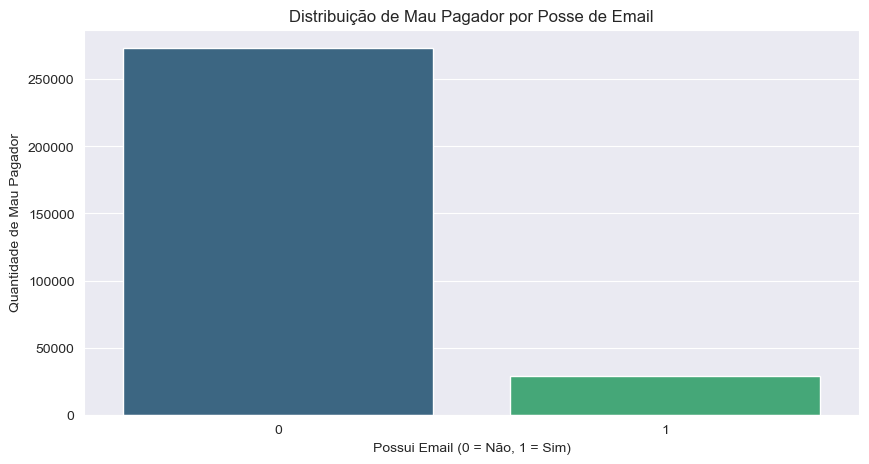

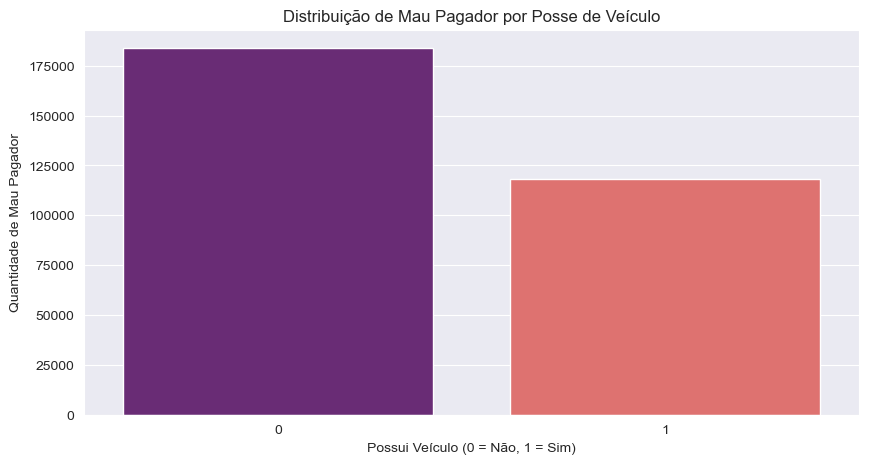

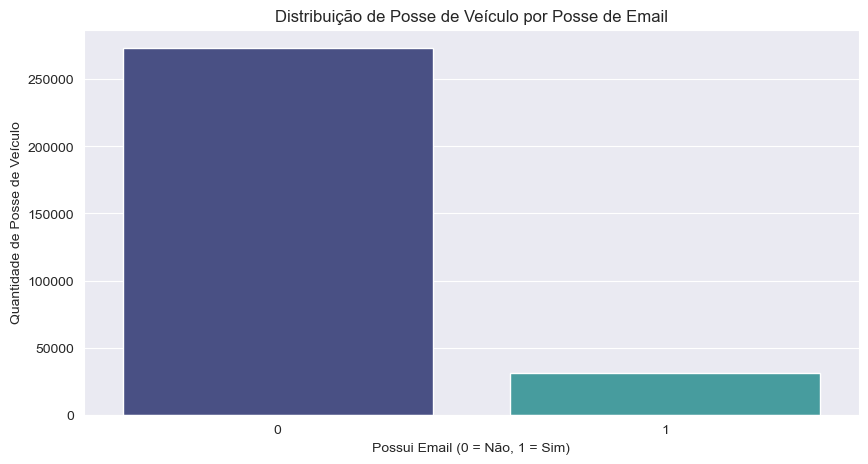

In [59]:
import matplotlib.pyplot as plt

crosstab_email = pd.crosstab(df['FLAG_EMAIL'], df['mau'])
crosstab_veiculo = pd.crosstab(df['FLAG_OWN_CAR_Y'], df['mau'])


# Plotando gráfico de barras para 'possui_email'
plt.figure(figsize=(10, 5))
sns.barplot(x=crosstab_email.index, y=crosstab_email[1], palette="viridis")
plt.title('Distribuição de Mau Pagador por Posse de Email')
plt.ylabel('Quantidade de Mau Pagador')
plt.xlabel('Possui Email (0 = Não, 1 = Sim)')
plt.show()

# Plotando gráfico de barras para 'posse_de_veiculo'
plt.figure(figsize=(10, 5))
sns.barplot(x=crosstab_veiculo.index, y=crosstab_veiculo[1], palette="magma")
plt.title('Distribuição de Mau Pagador por Posse de Veículo')
plt.ylabel('Quantidade de Mau Pagador')
plt.xlabel('Possui Veículo (0 = Não, 1 = Sim)')
plt.show()

# Tabela cruzada entre 'possui_email' e 'posse_de_veiculo'
crosstab_email_veiculo = pd.crosstab(df['FLAG_EMAIL'], df['FLAG_OWN_CAR_Y'])
# Plotando gráfico de barras para 'possui_email' e 'posse_de_veiculo'
plt.figure(figsize=(10, 5))
sns.barplot(x=crosstab_email_veiculo.index, y=crosstab_email_veiculo[1], palette="mako")
plt.title('Distribuição de Posse de Veículo por Posse de Email')
plt.ylabel('Quantidade de Posse de Veículo')
plt.xlabel('Possui Email (0 = Não, 1 = Sim)')
plt.show()



#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [60]:
# Salvando a base
df.to_csv('demo01.csv', index=False)